In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Loading in data

In [10]:
df = pd.read_excel('data/tech_layoffs.xlsx')
df.head()

,#,Company,Location_HQ,Country,Continent,Laid_Off,Date_layoffs,Percentage,Company_Size_before_Layoffs,Company_Size_after_layoffs,Industry,Stage,Money_Raised_in_$_mil,Year,lat,lng
0,3,ShareChat,Bengaluru,India,Asia,200,2023-12-20,15.0,1333,1133,Consumer,Series H,$1700,2023,12.97194,77.59369
1,4,InSightec,Haifa,Israel,Asia,100,2023-12-19,20.0,500,400,Healthcare,Unknown,$733,2023,32.81841,34.98850
2,6,Enphase Energy,San Francisco Bay Area,USA,North America,350,2023-12-18,10.0,3500,3150,Energy,Post-IPO,$116,2023,37.54827,-121.98857
3,7,Udaan,Bengaluru,India,Asia,100,2023-12-18,10.0,1000,900,Retail,Unknown,1500,2023,12.97194,77.59369
4,14,Cruise,San Francisco Bay Area,USA,North America,900,2023-12-14,24.0,3750,2850,Transportation,Acquired,$15000,2023,37.77493,-122.41942


## Correcting data types

In order to prepare the data for exploratory analysis, we are going to correct the datatypes such that they are easily usable by plotting functions.

In [11]:
df.dtypes

#                                       int64
Company                                object
Location_HQ                            object
Country                                object
Continent                              object
Laid_Off                                int64
Date_layoffs                   datetime64[ns]
Percentage                            float64
Company_Size_before_Layoffs             int64
Company_Size_after_layoffs              int64
Industry                               object
Stage                                  object
Money_Raised_in_$_mil                  object
Year                                    int64
lat                                   float64
lng                                   float64
dtype: object

In [12]:
df['Funding'] = df['Money_Raised_in_$_mil'].apply(lambda s: np.float64(s[1:])) 
df['Funding'].head()

0     1700.0
1      733.0
2      116.0
3      500.0
4    15000.0
Name: Funding, dtype: float64

## Correlation between funding and Percent Layoffs

In [13]:
df

,#,Company,Location_HQ,Country,Continent,Laid_Off,Date_layoffs,Percentage,Company_Size_before_Layoffs,Company_Size_after_layoffs,Industry,Stage,Money_Raised_in_$_mil,Year,lat,lng,Funding
0,3,ShareChat,Bengaluru,India,Asia,200,2023-12-20,15.0,1333,1133,Consumer,Series H,$1700,2023,12.97194,77.59369,1700.0
1,4,InSightec,Haifa,Israel,Asia,100,2023-12-19,20.0,500,400,Healthcare,Unknown,$733,2023,32.81841,34.98850,733.0
2,6,Enphase Energy,San Francisco Bay Area,USA,North America,350,2023-12-18,10.0,3500,3150,Energy,Post-IPO,$116,2023,37.54827,-121.98857,116.0
3,7,Udaan,Bengaluru,India,Asia,100,2023-12-18,10.0,1000,900,Retail,Unknown,1500,2023,12.97194,77.59369,500.0
4,14,Cruise,San Francisco Bay Area,USA,North America,900,2023-12-14,24.0,3750,2850,Transportation,Acquired,$15000,2023,37.77493,-122.41942,15000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413,3286,Pitch,Berlin,Germany,Europe,80,2024-08-01,67.0,119,39,Other,Series B,$138,2024,52.52437,13.41053,138.0
1414,3287,BenchSci,Toronto,Canada,North America,70,2024-08-01,17.0,412,342,Healthcare,Series D,$164,2024,43.70643,-79.39864,164.0
1415,3288,NanoString Technology,Seattle,USA,North America,50,2024-08-01,9.0,556,506,Healthcare,Post-IPO,$826,2024,47.60621,-122.33207,826.0
1416,3289,Trigo,Tel Aviv,Israel,Asia,30,2024-04-01,15.0,200,170,Retail,Series C,$199,2024,32.08088,34.78057,199.0


In [8]:
df['Stage'].unique().shape

(16,)

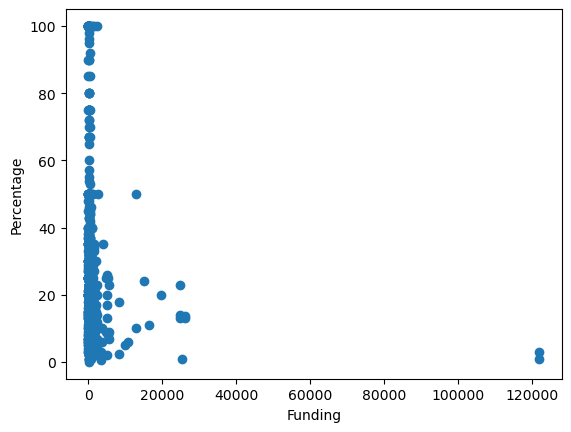

In [17]:
plt.scatter(df['Funding'], df['Percentage'])
plt.xlabel('Funding')
plt.ylabel('Percentage')
plt.show()

(array([1.401e+03, 4.000e+00, 4.000e+00, 1.000e+00, 6.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00]),
 array([     0.,   6095.,  12190.,  18285.,  24380.,  30475.,  36570.,
         42665.,  48760.,  54855.,  60950.,  67045.,  73140.,  79235.,
         85330.,  91425.,  97520., 103615., 109710., 115805., 121900.]),
 <BarContainer object of 20 artists>)

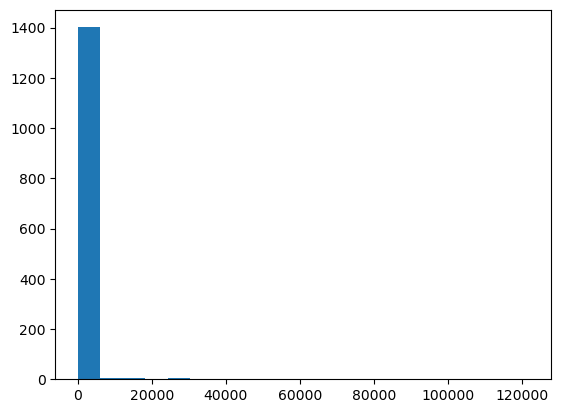

In [19]:
plt.hist(df['Funding'], bins=20)

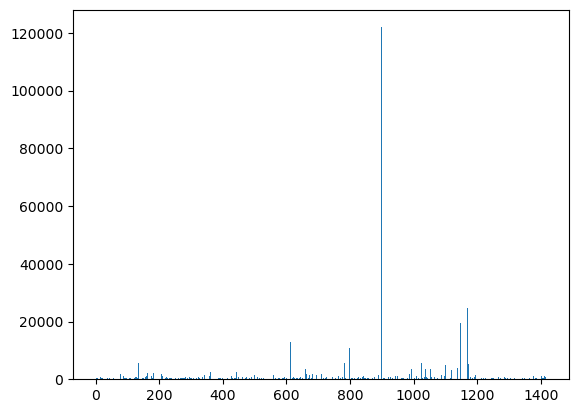

In [30]:
fig,ax = plt.subplots()
index = range(len(df))
bar1 = ax.bar(index,df['Funding'],1, label='Funding')
bar2 = ax.bar([i+0.3 for i in index],df['Percentage'],1,label='Percentage')

In [31]:
df

,#,Company,Location_HQ,Country,Continent,Laid_Off,Date_layoffs,Percentage,Company_Size_before_Layoffs,Company_Size_after_layoffs,Industry,Stage,Money_Raised_in_$_mil,Year,lat,lng,Funding
0,3,ShareChat,Bengaluru,India,Asia,200,2023-12-20,15.0,1333,1133,Consumer,Series H,$1700,2023,12.97194,77.59369,1700.0
1,4,InSightec,Haifa,Israel,Asia,100,2023-12-19,20.0,500,400,Healthcare,Unknown,$733,2023,32.81841,34.98850,733.0
2,6,Enphase Energy,San Francisco Bay Area,USA,North America,350,2023-12-18,10.0,3500,3150,Energy,Post-IPO,$116,2023,37.54827,-121.98857,116.0
3,7,Udaan,Bengaluru,India,Asia,100,2023-12-18,10.0,1000,900,Retail,Unknown,1500,2023,12.97194,77.59369,500.0
4,14,Cruise,San Francisco Bay Area,USA,North America,900,2023-12-14,24.0,3750,2850,Transportation,Acquired,$15000,2023,37.77493,-122.41942,15000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413,3286,Pitch,Berlin,Germany,Europe,80,2024-08-01,67.0,119,39,Other,Series B,$138,2024,52.52437,13.41053,138.0
1414,3287,BenchSci,Toronto,Canada,North America,70,2024-08-01,17.0,412,342,Healthcare,Series D,$164,2024,43.70643,-79.39864,164.0
1415,3288,NanoString Technology,Seattle,USA,North America,50,2024-08-01,9.0,556,506,Healthcare,Post-IPO,$826,2024,47.60621,-122.33207,826.0
1416,3289,Trigo,Tel Aviv,Israel,Asia,30,2024-04-01,15.0,200,170,Retail,Series C,$199,2024,32.08088,34.78057,199.0


In [50]:
stages=df['Stage'].unique()

In [60]:
list_stages_df = []
for i in stages:
    x = df[df.get('Stage') == i]
    list_stages_df.append(x)
list_stages_df[0].get('Percentage').mean()

11.196265369890478

In [61]:
mean_stages_df = []
for i in list_stages_df:
    y = i.get('Percentage').mean()
    mean_stages_df.append(y)
mean_stages_df

[11.196265369890478,
 24.127573268431192,
 15.325708964836073,
 28.393939393939394,
 15.963369963369964,
 22.411428571428573,
 29.338461538461537,
 13.571428571428571,
 33.593023255813954,
 16.857142857142858,
 18.253164556962027,
 12.04,
 55.57692307692308,
 5.666666666666667,
 9.605868083631744,
 14.25]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Series H'),
  Text(1, 0, 'Unknown'),
  Text(2, 0, 'Post-IPO'),
  Text(3, 0, 'Acquired'),
  Text(4, 0, 'Series E'),
  Text(5, 0, 'Series C'),
  Text(6, 0, 'Series B'),
  Text(7, 0, 'Series F'),
  Text(8, 0, 'Series A'),
  Text(9, 0, 'Series G'),
  Text(10, 0, 'Series D'),
  Text(11, 0, 'Private Equity …'),
  Text(12, 0, 'Seed'),
  Text(13, 0, 'Subsidi…'),
  Text(14, 0, 'Series I'),
  Text(15, 0, 'Series J')])

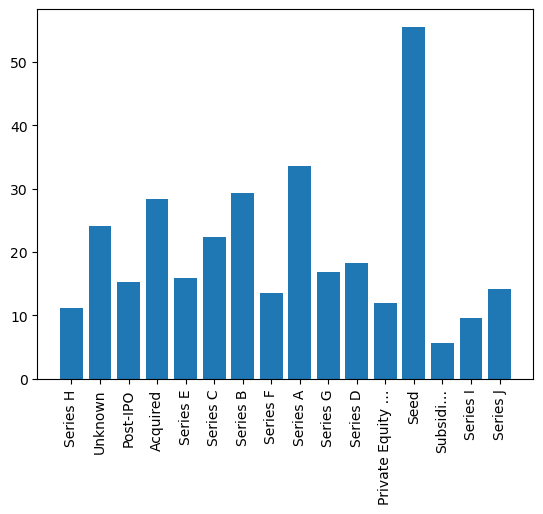

In [63]:
plt.bar(stages, mean_stages_df)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Series H'),
  Text(1, 0, 'Unknown'),
  Text(2, 0, 'Post-IPO'),
  Text(3, 0, 'Acquired'),
  Text(4, 0, 'Series E'),
  Text(5, 0, 'Series C'),
  Text(6, 0, 'Series B'),
  Text(7, 0, 'Series F'),
  Text(8, 0, 'Series A'),
  Text(9, 0, 'Series G'),
  Text(10, 0, 'Series D'),
  Text(11, 0, 'Private Equity …'),
  Text(12, 0, 'Seed'),
  Text(13, 0, 'Subsidi…'),
  Text(14, 0, 'Series I'),
  Text(15, 0, 'Series J')])

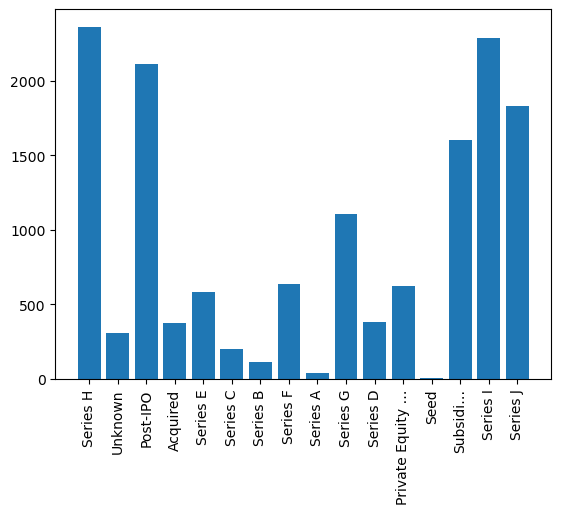

In [64]:
mean_funding_df = []
for i in list_stages_df:
    y = i.get('Funding').mean()
    mean_funding_df.append(y)
plt.bar(stages, mean_funding_df)
plt.xticks(rotation=90)